<a href="https://colab.research.google.com/github/mehrotrasan16/Keras-Deep-Learning/blob/01-CIFAR10-70.099/01_keras_cifar10_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import TensorFlow

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras

### Download and prepare the CIFAR10 dataset


The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

### Verify the data

To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image.


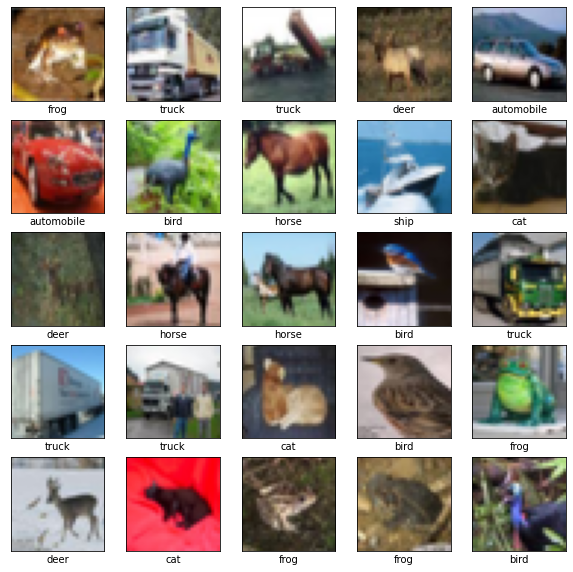

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [4]:
len(train_images),len(test_images)

(50000, 10000)

In [5]:
len(train_images)/20

2500.0

## 68.839

### Create the model (your code goes here)

In [ ]:
#INSERT YOUR MODEL CODE HERE
#YOU CAN ALSO CHANGE THE CODE BELOW TO COMPILE AND RUN THE MODEL
#setup model
model = keras.Sequential([
    keras.layers.Conv2D(kernel_size=3,filters=12,use_bias=False,padding='same',input_shape=(32,32,3)),
    keras.layers.BatchNormalization(center=True,scale=False),
    keras.layers.Activation('relu'),

    keras.layers.Conv2D(kernel_size=6,filters=24,use_bias=False,padding='same',strides=2),
    keras.layers.BatchNormalization(center=True,scale=False),
    keras.layers.Activation('relu'),
    
    keras.layers.Conv2D(kernel_size=6,filters=32,use_bias=False,padding='same',strides=2),
    keras.layers.BatchNormalization(center=True,scale=False),
    keras.layers.Activation('relu'),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(128),
    keras.layers.BatchNormalization(center=True,scale=False),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.4),

    keras.layers.Dense(200),
    keras.layers.BatchNormalization(center=True,scale=False),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.4),
    
    keras.layers.Dense(10, activation = tf.nn.softmax)    
])

### Compile and train the model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 8s 5ms/step - loss: 2.0349 - accuracy: 0.4247 - val_loss: 1.9727 - val_accuracy: 0.4856
Epoch 2/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.9287 - accuracy: 0.5305 - val_loss: 1.9038 - val_accuracy: 0.5556
Epoch 3/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8797 - accuracy: 0.5806 - val_loss: 1.8987 - val_accuracy: 0.5594
Epoch 4/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8554 - accuracy: 0.6058 - val_loss: 1.8696 - val_accuracy: 0.5870
Epoch 5/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8337 - accuracy: 0.6268 - val_loss: 1.8278 - val_accuracy: 0.6316
Epoch 6/20
1563/1563 [==============================] - 7s 5ms/step - loss: 1.8157 - accuracy: 0.6449 - val_loss: 1.8299 - val_accuracy: 0.6281
Epoch 7/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7998 - accuracy: 0.6606 - val_loss: 2.0389 - val_accuracy:

### Evaluate the model

313/313 - 1s - loss: 1.7823 - accuracy: 0.6770


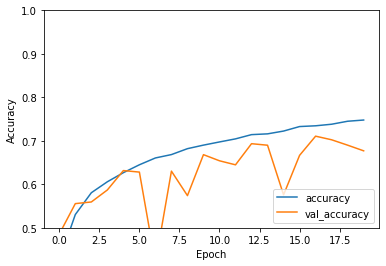

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(test_acc)

0.6769999861717224


## 69.29

In [ ]:
#INSERT YOUR MODEL CODE HERE
#YOU CAN ALSO CHANGE THE CODE BELOW TO COMPILE AND RUN THE MODEL
#setup model
model = keras.Sequential([
    keras.layers.Conv2D(kernel_size=3,filters=12,use_bias=False,padding='same',input_shape=(32,32,3)),
    keras.layers.BatchNormalization(center=True,scale=False),
    keras.layers.Activation('relu'),

    keras.layers.Conv2D(kernel_size=6,filters=24,use_bias=False,padding='same',strides=2),
    keras.layers.BatchNormalization(center=True,scale=False),
    keras.layers.Activation('relu'),
    
    keras.layers.Conv2D(kernel_size=12,filters=32,use_bias=False,padding='same',strides=2),
    keras.layers.BatchNormalization(center=True,scale=False),
    keras.layers.Activation('relu'),
    
    # keras.layers.Conv2D(kernel_size=24,filters=32,use_bias=False,padding='same',strides=2),
    # keras.layers.BatchNormalization(center=True,scale=False),
    # keras.layers.Activation('relu'),
    
    keras.layers.Flatten(),
    
    # keras.layers.Dense(128),
    # keras.layers.BatchNormalization(center=True,scale=False),
    # keras.layers.Activation('relu'),
    # keras.layers.Dropout(0.5),

    keras.layers.Dense(200),
    keras.layers.BatchNormalization(center=True,scale=False),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(500),
    keras.layers.BatchNormalization(center=True,scale=False),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.5),
    
    keras.layers.Dense(10, activation = tf.nn.softmax)    
])

### Compile and train the model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 8s 5ms/step - loss: 2.0534 - accuracy: 0.4027 - val_loss: 1.9994 - val_accuracy: 0.4579
Epoch 2/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.9545 - accuracy: 0.5027 - val_loss: 1.9265 - val_accuracy: 0.5291
Epoch 3/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.9059 - accuracy: 0.5516 - val_loss: 1.9073 - val_accuracy: 0.5504
Epoch 4/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8712 - accuracy: 0.5867 - val_loss: 1.8756 - val_accuracy: 0.5814
Epoch 5/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8499 - accuracy: 0.6077 - val_loss: 1.9679 - val_accuracy: 0.4899
Epoch 6/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8356 - accuracy: 0.6234 - val_loss: 1.8717 - val_accuracy: 0.5858
Epoch 7/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8161 - accuracy: 0.6431 - val_loss: 1.8578 - val_accuracy:

### Evaluate the model

313/313 - 1s - loss: 1.7653 - accuracy: 0.6946


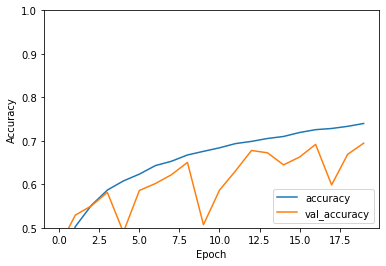

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(test_acc)

0.694599986076355


# 63.20

In [ ]:
#INSERT YOUR MODEL CODE HERE
#YOU CAN ALSO CHANGE THE CODE BELOW TO COMPILE AND RUN THE MODEL
#setup model
model = keras.Sequential([
    keras.layers.Conv2D(kernel_size=3,filters=12,use_bias=False,padding='same',input_shape=(32,32,3)),
    keras.layers.BatchNormalization(center=True,scale=False),
    keras.layers.Activation('relu'),
    # keras.layers.Dropout(0.5),
    keras.layers.MaxPool2D(),

    keras.layers.Conv2D(kernel_size=6,filters=24,use_bias=False,padding='same',strides=2),
    keras.layers.BatchNormalization(center=True,scale=False),
    keras.layers.Activation('relu'),
    # keras.layers.Dropout(0.5),
    keras.layers.MaxPool2D(),
    
    keras.layers.Conv2D(kernel_size=12,filters=32,use_bias=False,padding='same',strides=2),
    keras.layers.BatchNormalization(center=True,scale=False),
    keras.layers.Activation('relu'),
    keras.layers.MaxPool2D(),
    #keras.layers.Dropout(0.5),
    
    # keras.layers.Conv2D(kernel_size=24,filters=32,use_bias=False,padding='same',strides=2),
    # keras.layers.BatchNormalization(center=True,scale=False),
    # keras.layers.Activation('relu'),
    
    keras.layers.Flatten(),
    
    # keras.layers.Dense(128),
    # keras.layers.BatchNormalization(center=True,scale=False),
    # keras.layers.Activation('relu'),
    # keras.layers.Dropout(0.5),

    # keras.layers.Dense(200),
    # keras.layers.BatchNormalization(center=True,scale=False),
    # keras.layers.Activation('relu'),
    # keras.layers.Dropout(0.5),

    keras.layers.Dense(700),
    keras.layers.BatchNormalization(center=True,scale=False),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.5),
    
    keras.layers.Dense(10, activation = tf.nn.softmax)    
])

### Compile and train the model

In [ ]:
model.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 6s 4ms/step - loss: 2.0841 - accuracy: 0.3792 - val_loss: 2.0517 - val_accuracy: 0.4053
Epoch 2/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.9693 - accuracy: 0.4962 - val_loss: 1.9317 - val_accuracy: 0.5294
Epoch 3/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.9246 - accuracy: 0.5388 - val_loss: 2.1217 - val_accuracy: 0.3336
Epoch 4/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8949 - accuracy: 0.5690 - val_loss: 1.9119 - val_accuracy: 0.5485
Epoch 5/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8772 - accuracy: 0.5857 - val_loss: 1.8937 - val_accuracy: 0.5684
Epoch 6/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8633 - accuracy: 0.5990 - val_loss: 1.9006 - val_accuracy: 0.5588
Epoch 7/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8465 - accuracy: 0.6170 - val_loss: 1.8816 - val_accuracy:

### Evaluate the model

313/313 - 1s - loss: 1.8149 - accuracy: 0.6445


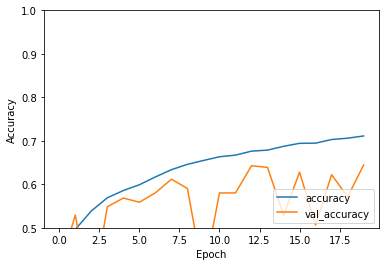

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(test_acc)

0.6445000171661377


# VGG Model

In [ ]:
from keras import Sequential
from keras.optimizers import SGD,Adam
from keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense

In [ ]:
model = keras.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


ValueError: ignored

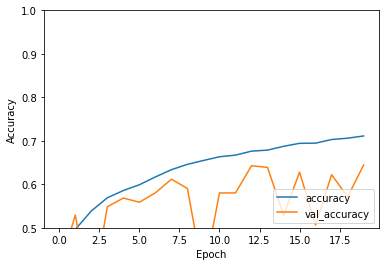

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# fit model
history = model.fit(train_images, train_labels, epochs=100, batch_size=64, validation_data=(test_images, test_labels), verbose=0)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(test_acc)

0.6445000171661377


# 10

In [ ]:
#INSERT YOUR MODEL CODE HERE
#YOU CAN ALSO CHANGE THE CODE BELOW TO COMPILE AND RUN THE MODEL
#setup model
model = keras.Sequential([
    # keras.layers.Conv2D(kernel_size=6,filters=64,use_bias=False,padding='same',input_shape=(32,32,3)),
    # keras.layers.BatchNormalization(center=True,scale=False),
    # keras.layers.Activation('relu'),
    #keras.layers.Dropout(0.5),
    #keras.layers.MaxPool2D(),

    keras.layers.Conv2D(kernel_size=6,filters=128,use_bias=False,padding='same',strides=2),
    keras.layers.BatchNormalization(center=True,scale=False),
    keras.layers.Activation('relu'),
    #keras.layers.Dropout(0.5),
    #keras.layers.MaxPool2D(),
    
    keras.layers.Conv2D(kernel_size=6,filters=256,use_bias=False,padding='same',strides=2),
    keras.layers.BatchNormalization(center=True,scale=False),
    keras.layers.Activation('relu'),
    #keras.layers.MaxPool2D(),
    #keras.layers.Dropout(0.5),
    
    # keras.layers.Conv2D(kernel_size=24,filters=32,use_bias=False,padding='same',strides=2),
    # keras.layers.BatchNormalization(center=True,scale=False),
    # keras.layers.Activation('relu'),
    
    keras.layers.Flatten(),
    
    # keras.layers.Dense(128),
    # keras.layers.BatchNormalization(center=True,scale=False),
    # keras.layers.Activation('relu'),
    # keras.layers.Dropout(0.5),

    # keras.layers.Dense(200),
    # keras.layers.BatchNormalization(center=True,scale=False),
    # keras.layers.Activation('relu'),
    # keras.layers.Dropout(0.5),

    keras.layers.Dense(700),
    keras.layers.BatchNormalization(center=True,scale=False),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.5),
    
    keras.layers.Dense(10, activation = tf.nn.softmax)    
])

### Compile and train the model

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=15, 
                    validation_data=(test_images, test_labels))

Epoch 1/15
1563/1563 [==============================] - 17s 11ms/step - loss: 2.0320 - accuracy: 0.4239 - val_loss: 2.0659 - val_accuracy: 0.3874
Epoch 2/15
1563/1563 [==============================] - 17s 11ms/step - loss: 1.9399 - accuracy: 0.5184 - val_loss: 1.9902 - val_accuracy: 0.4663
Epoch 3/15
1563/1563 [==============================] - 17s 11ms/step - loss: 1.8848 - accuracy: 0.5746 - val_loss: 1.9236 - val_accuracy: 0.5349
Epoch 4/15
1563/1563 [==============================] - 17s 11ms/step - loss: 1.8413 - accuracy: 0.6188 - val_loss: 1.8789 - val_accuracy: 0.5799
Epoch 5/15
1563/1563 [==============================] - 17s 11ms/step - loss: 1.8073 - accuracy: 0.6532 - val_loss: 1.9142 - val_accuracy: 0.5450
Epoch 6/15
1563/1563 [==============================] - 17s 11ms/step - loss: 1.7771 - accuracy: 0.6837 - val_loss: 1.8176 - val_accuracy: 0.6421
Epoch 7/15
1563/1563 [==============================] - 17s 11ms/step - loss: 1.7554 - accuracy: 0.7058 - val_loss: 1.7875 -

### Evaluate the model

313/313 - 1s - loss: 1.7761 - accuracy: 0.6855


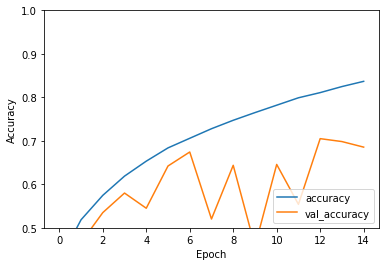

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(test_acc)

0.6855000257492065


# For Loop #2

Epoch 1/15
1563/1563 [==============================] - 9s 6ms/step - loss: 2.0415 - accuracy: 0.4126 - val_loss: 2.0496 - val_accuracy: 0.4033
Epoch 2/15
1563/1563 [==============================] - 9s 6ms/step - loss: 1.9384 - accuracy: 0.5188 - val_loss: 1.9171 - val_accuracy: 0.5403
Epoch 3/15
1563/1563 [==============================] - 9s 6ms/step - loss: 1.8970 - accuracy: 0.5616 - val_loss: 2.0134 - val_accuracy: 0.4426
Epoch 4/15
1563/1563 [==============================] - 9s 6ms/step - loss: 1.8688 - accuracy: 0.5901 - val_loss: 1.9311 - val_accuracy: 0.5261
Epoch 5/15
1563/1563 [==============================] - 9s 6ms/step - loss: 1.8476 - accuracy: 0.6114 - val_loss: 2.0606 - val_accuracy: 0.3969
Epoch 6/15
1563/1563 [==============================] - 9s 6ms/step - loss: 1.8269 - accuracy: 0.6319 - val_loss: 1.8773 - val_accuracy: 0.5796
Epoch 7/15
1563/1563 [==============================] - 9s 6ms/step - loss: 1.8140 - accuracy: 0.6450 - val_loss: 1.8948 - val_accuracy:

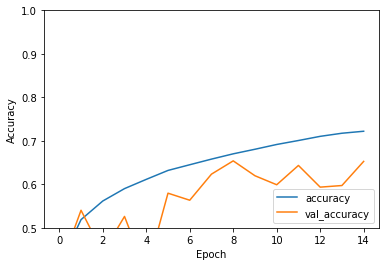

313/313 - 1s - loss: 1.8053 - accuracy: 0.6527
--------------------------------- 3 256 2 0.6527000069618225 ---------------------------
Epoch 1/15
1563/1563 [==============================] - 23s 15ms/step - loss: 2.0338 - accuracy: 0.4219 - val_loss: 1.9934 - val_accuracy: 0.4615
Epoch 2/15
1563/1563 [==============================] - 23s 15ms/step - loss: 1.9430 - accuracy: 0.5149 - val_loss: 1.9368 - val_accuracy: 0.5193
Epoch 3/15
1563/1563 [==============================] - 23s 15ms/step - loss: 1.8998 - accuracy: 0.5574 - val_loss: 2.0088 - val_accuracy: 0.4485
Epoch 4/15
1563/1563 [==============================] - 23s 15ms/step - loss: 1.8644 - accuracy: 0.5934 - val_loss: 1.9819 - val_accuracy: 0.4752
Epoch 5/15
1563/1563 [==============================] - 23s 15ms/step - loss: 1.8440 - accuracy: 0.6144 - val_loss: 1.9200 - val_accuracy: 0.5368
Epoch 6/15
1563/1563 [==============================] - 23s 15ms/step - loss: 1.8258 - accuracy: 0.6328 - val_loss: 1.8778 - val_accur

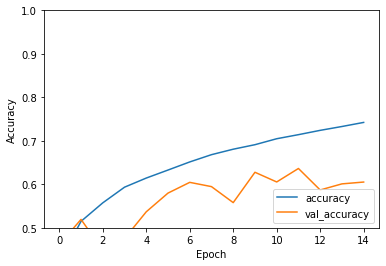

313/313 - 1s - loss: 1.8526 - accuracy: 0.6052
--------------------------------- 3 512 2 0.6051999926567078 ---------------------------
Epoch 1/15
1563/1563 [==============================] - 73s 47ms/step - loss: 2.0451 - accuracy: 0.4089 - val_loss: 2.1128 - val_accuracy: 0.3429
Epoch 2/15
1563/1563 [==============================] - 73s 47ms/step - loss: 1.9523 - accuracy: 0.5059 - val_loss: 1.9845 - val_accuracy: 0.4722
Epoch 3/15
1563/1563 [==============================] - 73s 47ms/step - loss: 1.9091 - accuracy: 0.5486 - val_loss: 1.9094 - val_accuracy: 0.5471
Epoch 4/15
1563/1563 [==============================] - 73s 47ms/step - loss: 1.8743 - accuracy: 0.5845 - val_loss: 1.9103 - val_accuracy: 0.5488
Epoch 5/15
1563/1563 [==============================] - 73s 47ms/step - loss: 1.8467 - accuracy: 0.6110 - val_loss: 1.8684 - val_accuracy: 0.5914
Epoch 6/15
1563/1563 [==============================] - 73s 47ms/step - loss: 1.8311 - accuracy: 0.6291 - val_loss: 1.8985 - val_accur

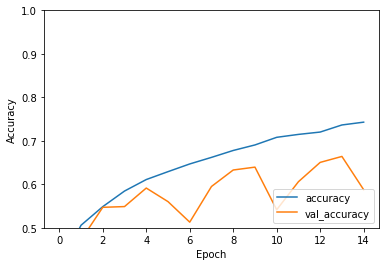

313/313 - 2s - loss: 1.8709 - accuracy: 0.5876
--------------------------------- 3 1024 2 0.5875999927520752 ---------------------------
Epoch 1/15
1563/1563 [==============================] - 22s 14ms/step - loss: 2.0506 - accuracy: 0.4038 - val_loss: 2.0857 - val_accuracy: 0.3665
Epoch 2/15
1563/1563 [==============================] - 21s 14ms/step - loss: 1.9628 - accuracy: 0.4926 - val_loss: 1.9843 - val_accuracy: 0.4720
Epoch 3/15
1563/1563 [==============================] - 21s 14ms/step - loss: 1.9075 - accuracy: 0.5503 - val_loss: 2.1260 - val_accuracy: 0.3315
Epoch 4/15
1563/1563 [==============================] - 21s 14ms/step - loss: 1.8763 - accuracy: 0.5819 - val_loss: 1.8804 - val_accuracy: 0.5772
Epoch 5/15
1563/1563 [==============================] - 21s 14ms/step - loss: 1.8482 - accuracy: 0.6099 - val_loss: 1.8946 - val_accuracy: 0.5647
Epoch 6/15
1563/1563 [==============================] - 21s 14ms/step - loss: 1.8328 - accuracy: 0.6252 - val_loss: 1.8560 - val_accu

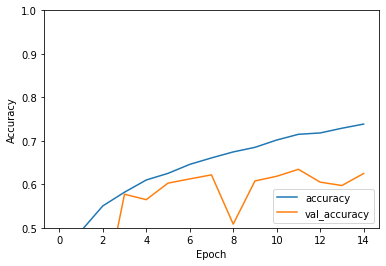

313/313 - 1s - loss: 1.8353 - accuracy: 0.6249
--------------------------------- 6 256 2 0.6248999834060669 ---------------------------
Epoch 1/15
1563/1563 [==============================] - 83s 53ms/step - loss: 2.0548 - accuracy: 0.4004 - val_loss: 2.0941 - val_accuracy: 0.3613
Epoch 2/15
1563/1563 [==============================] - 82s 53ms/step - loss: 1.9699 - accuracy: 0.4869 - val_loss: 1.9690 - val_accuracy: 0.4875
Epoch 3/15
1563/1563 [==============================] - 83s 53ms/step - loss: 1.9137 - accuracy: 0.5444 - val_loss: 1.9596 - val_accuracy: 0.4963
Epoch 4/15
1563/1563 [==============================] - 83s 53ms/step - loss: 1.8798 - accuracy: 0.5781 - val_loss: 1.9762 - val_accuracy: 0.4799
Epoch 5/15
1563/1563 [==============================] - 83s 53ms/step - loss: 1.8555 - accuracy: 0.6036 - val_loss: 1.9887 - val_accuracy: 0.4679
Epoch 6/15
1563/1563 [==============================] - 83s 53ms/step - loss: 1.8368 - accuracy: 0.6214 - val_loss: 1.9142 - val_accur

KeyboardInterrupt: ignored

In [31]:
meta2 = []
for ks in [3,6]:
    for f in [256,512,1024]:
        for s in [2]:
            model = keras.Sequential([

                keras.layers.Conv2D(kernel_size=ks,filters=f,use_bias=False,padding='same',strides=s),
                keras.layers.BatchNormalization(center=True,scale=False),
                keras.layers.Activation('relu'),
                keras.layers.MaxPool2D(),
                
                keras.layers.Conv2D(kernel_size=ks,filters=f,use_bias=False,padding='same',strides=s),
                keras.layers.BatchNormalization(center=True,scale=False),
                keras.layers.Activation('relu'),
                keras.layers.MaxPool2D(),                
                
                keras.layers.Conv2D(kernel_size=ks,filters=f,use_bias=False,padding='same',strides=s),
                keras.layers.BatchNormalization(center=True,scale=False),
                keras.layers.Activation('relu'),
                
                keras.layers.Flatten(),
                
                keras.layers.Dense(700),
                keras.layers.BatchNormalization(center=True,scale=False),
                keras.layers.Activation('relu'),
                keras.layers.Dropout(0.5),
                
                keras.layers.Dense(10, activation = tf.nn.softmax)    
            ])

            model.compile(optimizer=keras.optimizers.Adam(),
                        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                        metrics=['accuracy'])

            history = model.fit(train_images, train_labels, epochs=15, 
                                validation_data=(test_images, test_labels))

            plt.plot(history.history['accuracy'], label='accuracy')
            plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
            plt.xlabel('Epoch')
            plt.ylabel('Accuracy')
            plt.ylim([0.5, 1])
            plt.legend(loc='lower right')
            plt.show()

            test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
            meta.append([ks,f,s,test_acc])
            print("---------------------------------",ks,f,s,test_acc,"---------------------------")

In [ ]:
meta

## CIFARMODELO

In [33]:
model = keras.Sequential([

    keras.layers.Conv2D(kernel_size=3,filters=96,use_bias=False,padding='same'),
    keras.layers.BatchNormalization(center=True,scale=False),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(kernel_size=6,filters=96,use_bias=False,padding='same',strides=2),
    keras.layers.BatchNormalization(center=True,scale=False),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Conv2D(kernel_size=6,filters=192,use_bias=False,padding='same',strides=2),
    keras.layers.BatchNormalization(center=True,scale=False),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(256),
    keras.layers.BatchNormalization(center=True,scale=False),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.4),

    keras.layers.Dense(512),
    keras.layers.BatchNormalization(center=True,scale=False),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.5),
    
    keras.layers.Dense(10, activation = tf.nn.softmax)      
])

In [34]:
import math
def lr_decay(epoch):
    return 0.01 * math.pow(0.6,epoch)

lr_decay_callback = keras.callbacks.LearningRateScheduler(lr_decay,verbose=True)

In [35]:
#compile model
model.compile(optimizer='adam',
          loss='sparse_categorical_crossentropy',
          metrics=['accuracy'],
          )

In [36]:
history = model.fit(train_images, train_labels, epochs=15, 
                validation_data=(test_images, test_labels),
                #callbacks=[lr_decay_callback]
                )

Epoch 1/15
1563/1563 [==============================] - 12s 8ms/step - loss: 1.6653 - accuracy: 0.4083 - val_loss: 1.3185 - val_accuracy: 0.5234
Epoch 2/15
1563/1563 [==============================] - 12s 8ms/step - loss: 1.2089 - accuracy: 0.5713 - val_loss: 1.2071 - val_accuracy: 0.5784
Epoch 3/15
1563/1563 [==============================] - 12s 8ms/step - loss: 1.0542 - accuracy: 0.6310 - val_loss: 1.1732 - val_accuracy: 0.5974
Epoch 4/15
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9494 - accuracy: 0.6711 - val_loss: 0.9732 - val_accuracy: 0.6636
Epoch 5/15
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8682 - accuracy: 0.7004 - val_loss: 0.8172 - val_accuracy: 0.7157
Epoch 6/15
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7968 - accuracy: 0.7254 - val_loss: 0.9583 - val_accuracy: 0.6772
Epoch 7/15
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7435 - accuracy: 0.7462 - val_loss: 0.8679 - val_ac

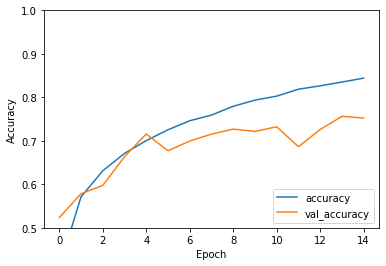

313/313 - 1s - loss: 0.7832 - accuracy: 0.7525


In [37]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)